### Another lensed dataset by Haris, without SNR cutoff
### Works only on Alice
copied from Alice: /home1/srashti.goyal/lensing/lensing_pol/notebooks/lensing_pol_injections_params_new.ipynb

In [1]:
import numpy as np, pickle
import matplotlib.pylab as plt
from cosmology_models import LCDM

lcdm = LCDM(0.3)
data_loc='/home1/srashti.goyal/lensing/lensing_pol/data/lensed_params_pickles_by_haris/'
# above directory contains 19 pickles
with open(data_loc+'dominik_plaw2_lensed_data_2.pickle', 'rb') as handle:
    data = pickle.load(handle)  

In [2]:
m1z = data['m1']
m2z = data['m2']
ra = data['ra']
dec = data['dec']
iota = data['iota']
pol = data['pol']
dl_un = data['dl_unlensed']
snr = data['snr']
t=data['t']
dl=data['dl']

In [3]:
data.keys()

dict_keys(['m1', 'm2', 'ra', 'dec', 'iota', 'pol', 't_unlensed', 'dl_unlensed', 'snr', 'dl', 't'])

In [4]:
z = np.array(np.zeros(len(dl_un)))
for ii in range(len(dl_un)):
    z[ii] = lcdm.z_from_luminosity_distance(dl_un[ii])
m1s = m1z/(1+z)
m2s = m2z/(1+z)


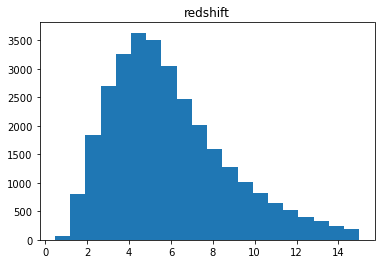

In [5]:
plt.hist(z,20)
plt.title('redshift')
plt.show()

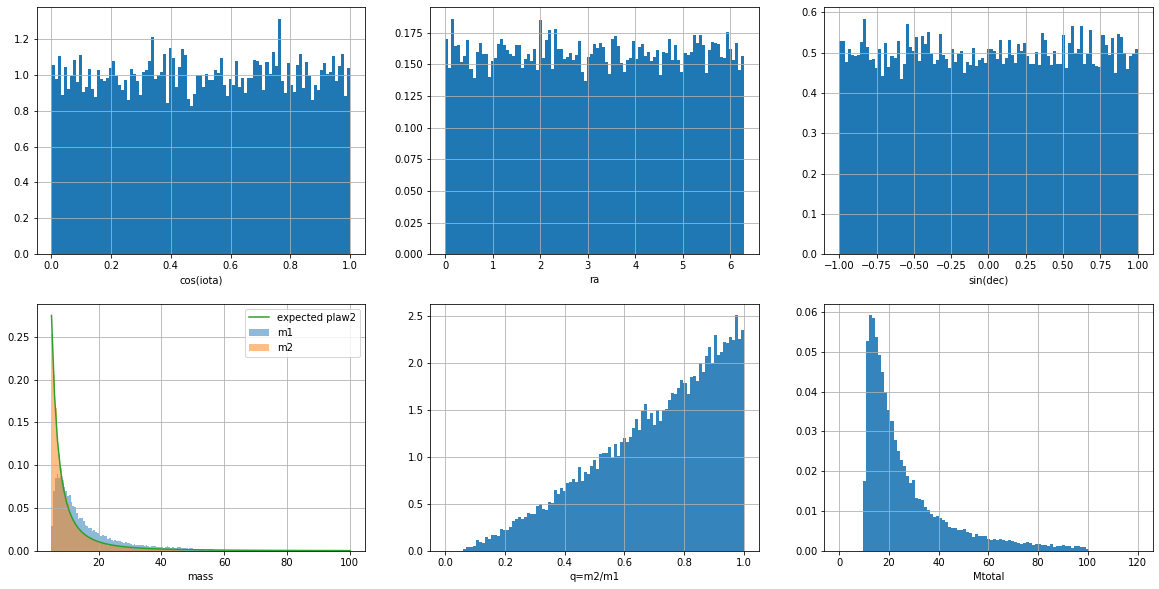

In [6]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
b = np.linspace(0,1,100)
plt.hist(np.cos(iota),b,density=True)
plt.grid()
plt.xlabel('cos(iota)')

plt.subplot(2,3,2)
b = np.linspace(0,2*np.pi,100)
plt.hist(ra,b,density=True)
plt.grid()
plt.xlabel('ra')

plt.subplot(2,3,3)
b = np.linspace(-1,1,100)
plt.hist(np.sin(dec),b,density=True)
plt.grid()
plt.xlabel('sin(dec)')

plt.subplot(2,3,4)
b = np.linspace(5,60,100)
plt.hist(m1s,b,density=True,label='m1',alpha=0.5)
plt.hist(m2s,b,density=True,label='m2',alpha=0.5)
const=1.35/(1/5**1.35 - 1/100**1.35)
m1_arr=np.linspace(5,100,100)
plt.plot(m1_arr,const*m1_arr**(-2.35),label='expected plaw2')
plt.grid()
plt.xlabel('mass')
plt.legend()

plt.subplot(2,3,5)
b = np.linspace(0,1,100)
plt.hist(m2s/m1s,b,density=True,alpha=0.9)
#plt.hist(m2s,b,density=True,label='m2',alpha=0.5)
plt.grid()
plt.xlabel('q=m2/m1')

plt.subplot(2,3,6)
b = np.linspace(0,120,100)
plt.hist(m1s+m2s,b,density=True,alpha=0.9)
#plt.hist(m2s,b,density=True,label='m2',alpha=0.5)
plt.grid()
plt.xlabel('Mtotal')
plt.show()

The mass 1 matches the power law 2 distribution in haris. et. al paper. Rest parameters are as expected.